In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris


In [20]:
# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [11]:
# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

In [14]:
# Create a DataFrame with the principal components
principal_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
principal_df

,Principal Component 1,Principal Component 2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835
...,...,...
145,1.870503,0.386966
146,1.564580,-0.896687
147,1.521170,0.269069
148,1.372788,1.011254


In [16]:
# Add the target variable to the principal components DataFrame
principal_df['Target'] = iris.target
principal_df

,Principal Component 1,Principal Component 2,Target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0
...,...,...,...
145,1.870503,0.386966,2
146,1.564580,-0.896687,2
147,1.521170,0.269069,2
148,1.372788,1.011254,2


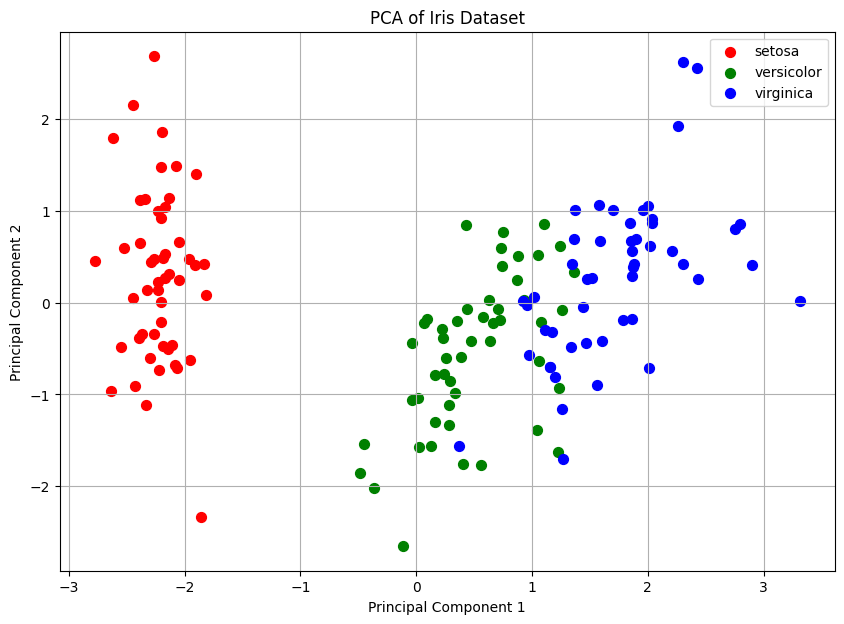

In [21]:
# Plotting the principal components
plt.figure(figsize=(10, 7))
targets = np.unique(iris.target)
colors = ['r', 'g', 'b']

for target, color in zip(targets, colors):
    indices_to_keep = principal_df['Target'] == target
    plt.scatter(principal_df.loc[indices_to_keep, 'Principal Component 1'],
                principal_df.loc[indices_to_keep, 'Principal Component 2'],
                c=color,
                s=50)
    
plt.title('PCA of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(iris.target_names)
plt.grid()
plt.show()
